# Visualiser des principes de base de l'IRM
## Quelques outils pour observer la composition des images du cerveau

Ce notebook présente des exemples d'images IRM utilisant différents types de séquences. Ces images ont pour but de visualiser les différents paramètres de l'IRM et leurs effets sur la représention des tissues.

### Nilearn
Nous utiliserons cette [librairie](https://nilearn.github.io/user_guide.html) pour effectuer l'ensemble du travail. Accédez la documentation pour davantage d'info et d'exemples.

* Nilearn 6.2

In [1]:
!pip show nilearn
# !pip install --upgrade nilearn

Name: nilearn
Version: 0.6.2
Summary: Statistical learning for neuroimaging in Python
Home-page: http://nilearn.github.io
Author: None
Author-email: None
License: new BSD
Location: c:\users\sangfrois\documents\computation\anaconda3\envs\sangfroisenv\lib\site-packages
Requires: scikit-learn, nibabel, scipy, joblib, sklearn, numpy
Required-by: netneurotools


Nilearn est gros, nous pouvons donc n'importer que les parties qui nous intéressent. Nilearn contient le module [`plotting`](https://nilearn.github.io/modules/reference.html#module-nilearn.plotting) nous permettant de tirer profit, en (presqu') une seule ligne de code, d'une vaste gamme de techniques de visualisation. Allez voir la liste, mais commençons par la base.

## Importer les données
On commence par récupérer des données. [Ici](https://nilearn.github.io/modules/reference.html#module-nilearn.datasets), vous avez la liste des jeux de données qui se retrouvent à même la librairie Nilearn. 

Nous choisissons le *template* (modèle) du Montreal Neurological Institute (MNI). Il s'agit, en quelque sorte, d'un cerveau moyen. Ces données représentent l'espace à partir duquel on repère les différentes régions cérébrales.

In [2]:
from nilearn.datasets import fetch_icbm152_2009
mni = fetch_icbm152_2009() # mni est un dictionnaire contenant plusieurs objets

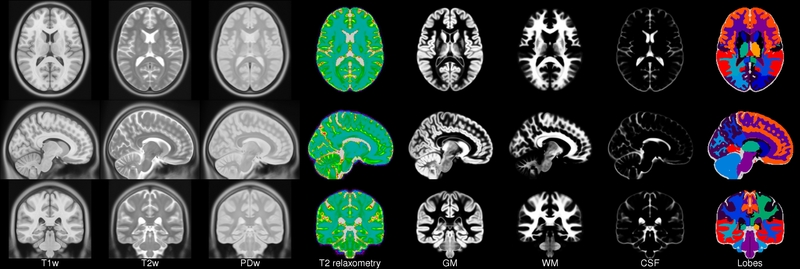

## Images pondérées en T1
On dit plus couramment qu'on utilise une séquence structurelle lorsqu'on regarde ces images. C'est ce qu'on veut dire lorsqu'on parle tout simplement d'une image par Résonance Magnétique.

#### Statique
`plot_anat` visualise un scan anatomique. Ici, l'image retourne de façon statique. Nous avons une coordonnée représentée sur les trois coupes. Nous restons donc en deux dimensions.

C'est une image typique de l'anatomie. Nous pouvons bien distinguer les tissue. La matière grise est grise, la blanche est blanche, les ventricules sont noirs (tout comme une partie de la boîte crânienne). Comme on l'a vu, c'est à l'aide de cette pondération que nous pouvons mener des analyses structurelles.

In [3]:
from nilearn.plotting import plot_anat
plot_anat(mni.t1, cut_coords=[-17, 0, 17],title='MRI en contraste T1')

(Pour ceux et celles qui sont curieux.ses, vous avez là un type d'objet qu'on appelle bytes, utilisé pour représenter le spectre noir à blanc sur les trois axes. Les Bytes prennent moins d'espace de stockage)

In [4]:
mni.t1?

#### Dynamique
`view_img`, quant à lui, nous permet d'interagir avec l'image à l'aide de notre curseur. On peut donc modifier la coordonnée d'origine.

In [5]:
from nilearn.plotting import view_img 
viewer = view_img(mni.t1, bg_img=None, title='MRI en contraste T1', cmap='gray', symmetric_cmap=False, 
                  black_bg=True, threshold=None,)

In [6]:
viewer.save_as_html('t1.html')

Nous avons accès à des données HTML qui nous permettent d'explorer les trois coupes. 

**[Ouvrez-les](t1.html)** (assurez-vous d'ouvrir ce lien dans un ***nouvel onglet***)

#### Rappel
Coupe par coupe, la bobine va perturber le champs créé par l'aimant. Les valeurs de gris retenues pour représenter le cerveau seront pondérées en considérant le moment du retour à l'équilibre des spins. Le TR est l'intervalle de temps entre deux ondes RF de 90° successives. Plus le TR est long, plus les différences entre les tissus vont être mises en évidence.
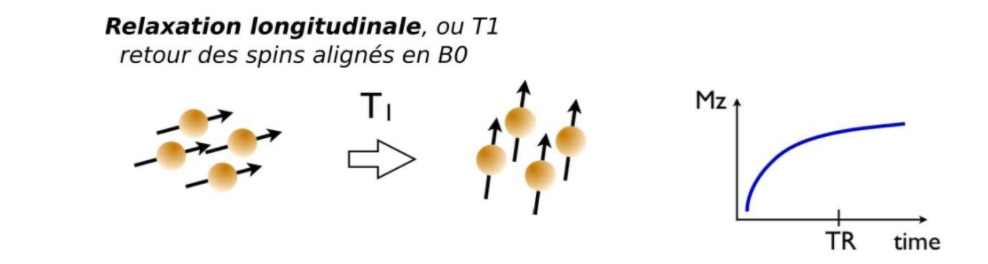

## Images pondérées en T2
Nous utilisons encore la fonction `plot_anat` pour représenter le spectre de noir à blanc (0 à 1) qui nous aide à distinguer les tissues. Le T2 est moins intuitif pour les dissocier; on ne l'utilise pas pour explorer les segmenter. 

#### Statique

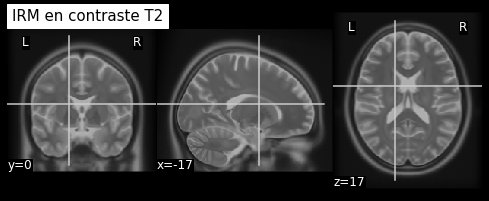

In [7]:
plot_anat(mni.t2, cut_coords=[-17, 0, 17], title='IRM en contraste T2')

#### Dynamique


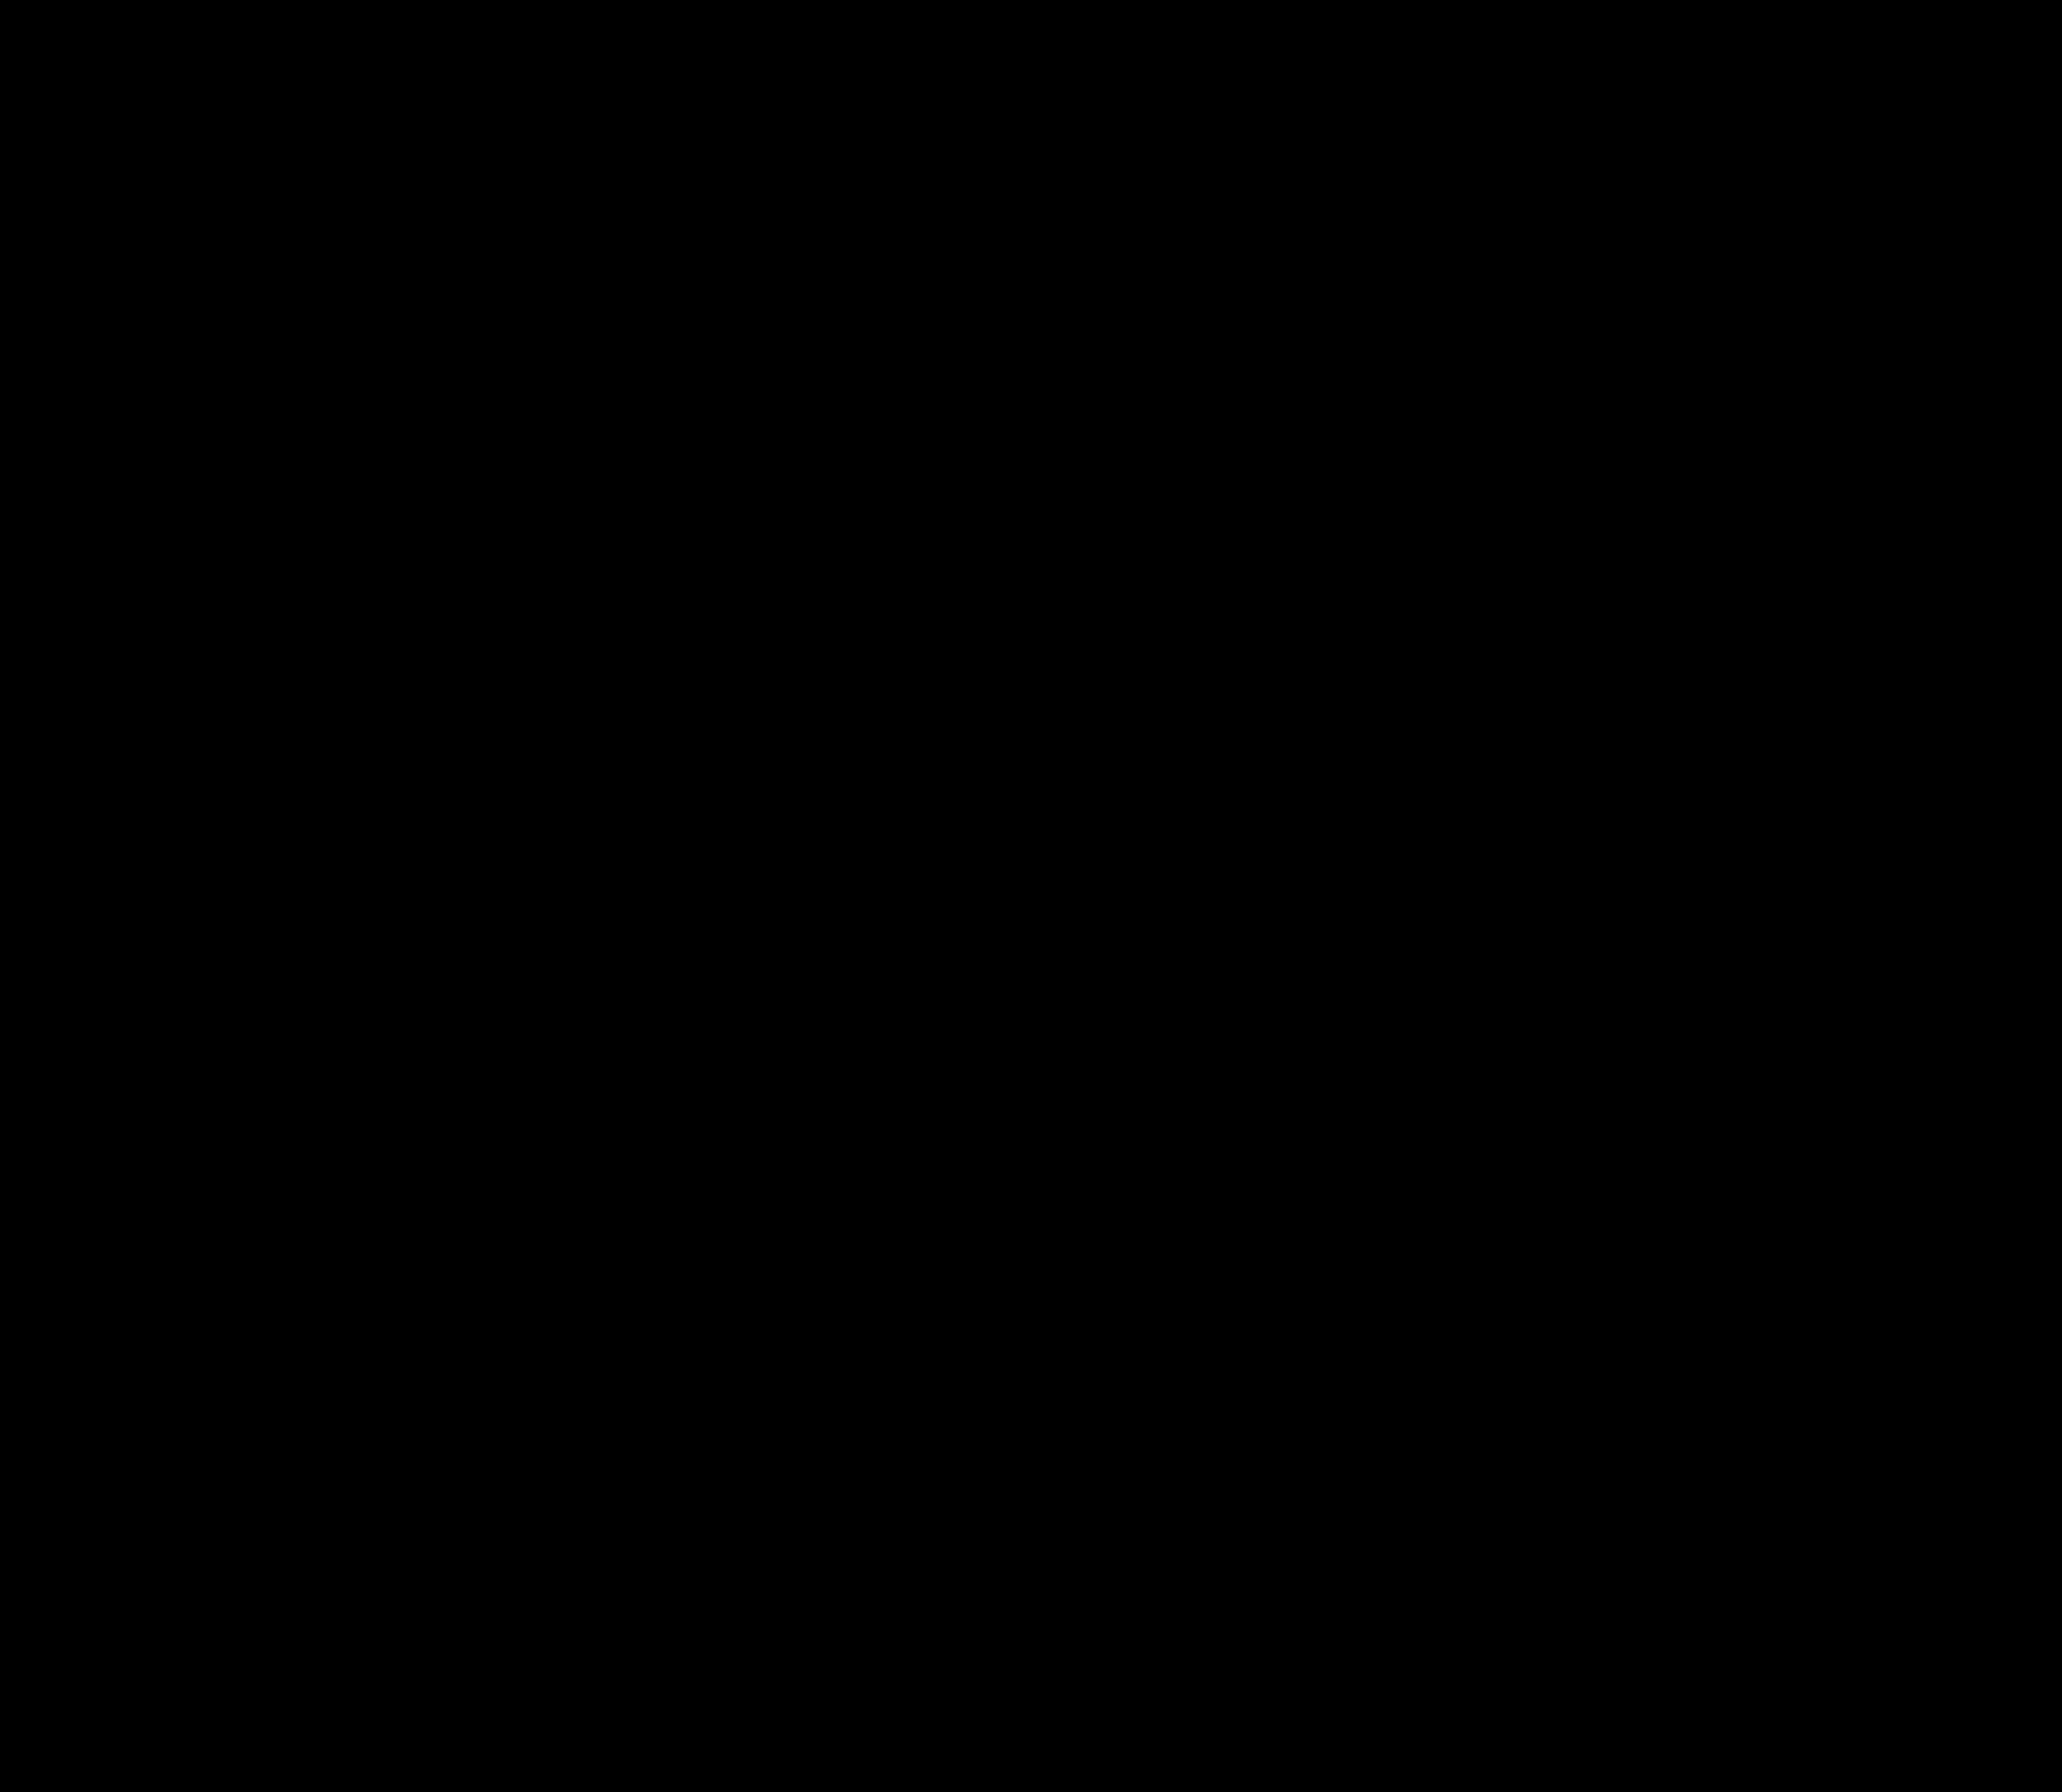
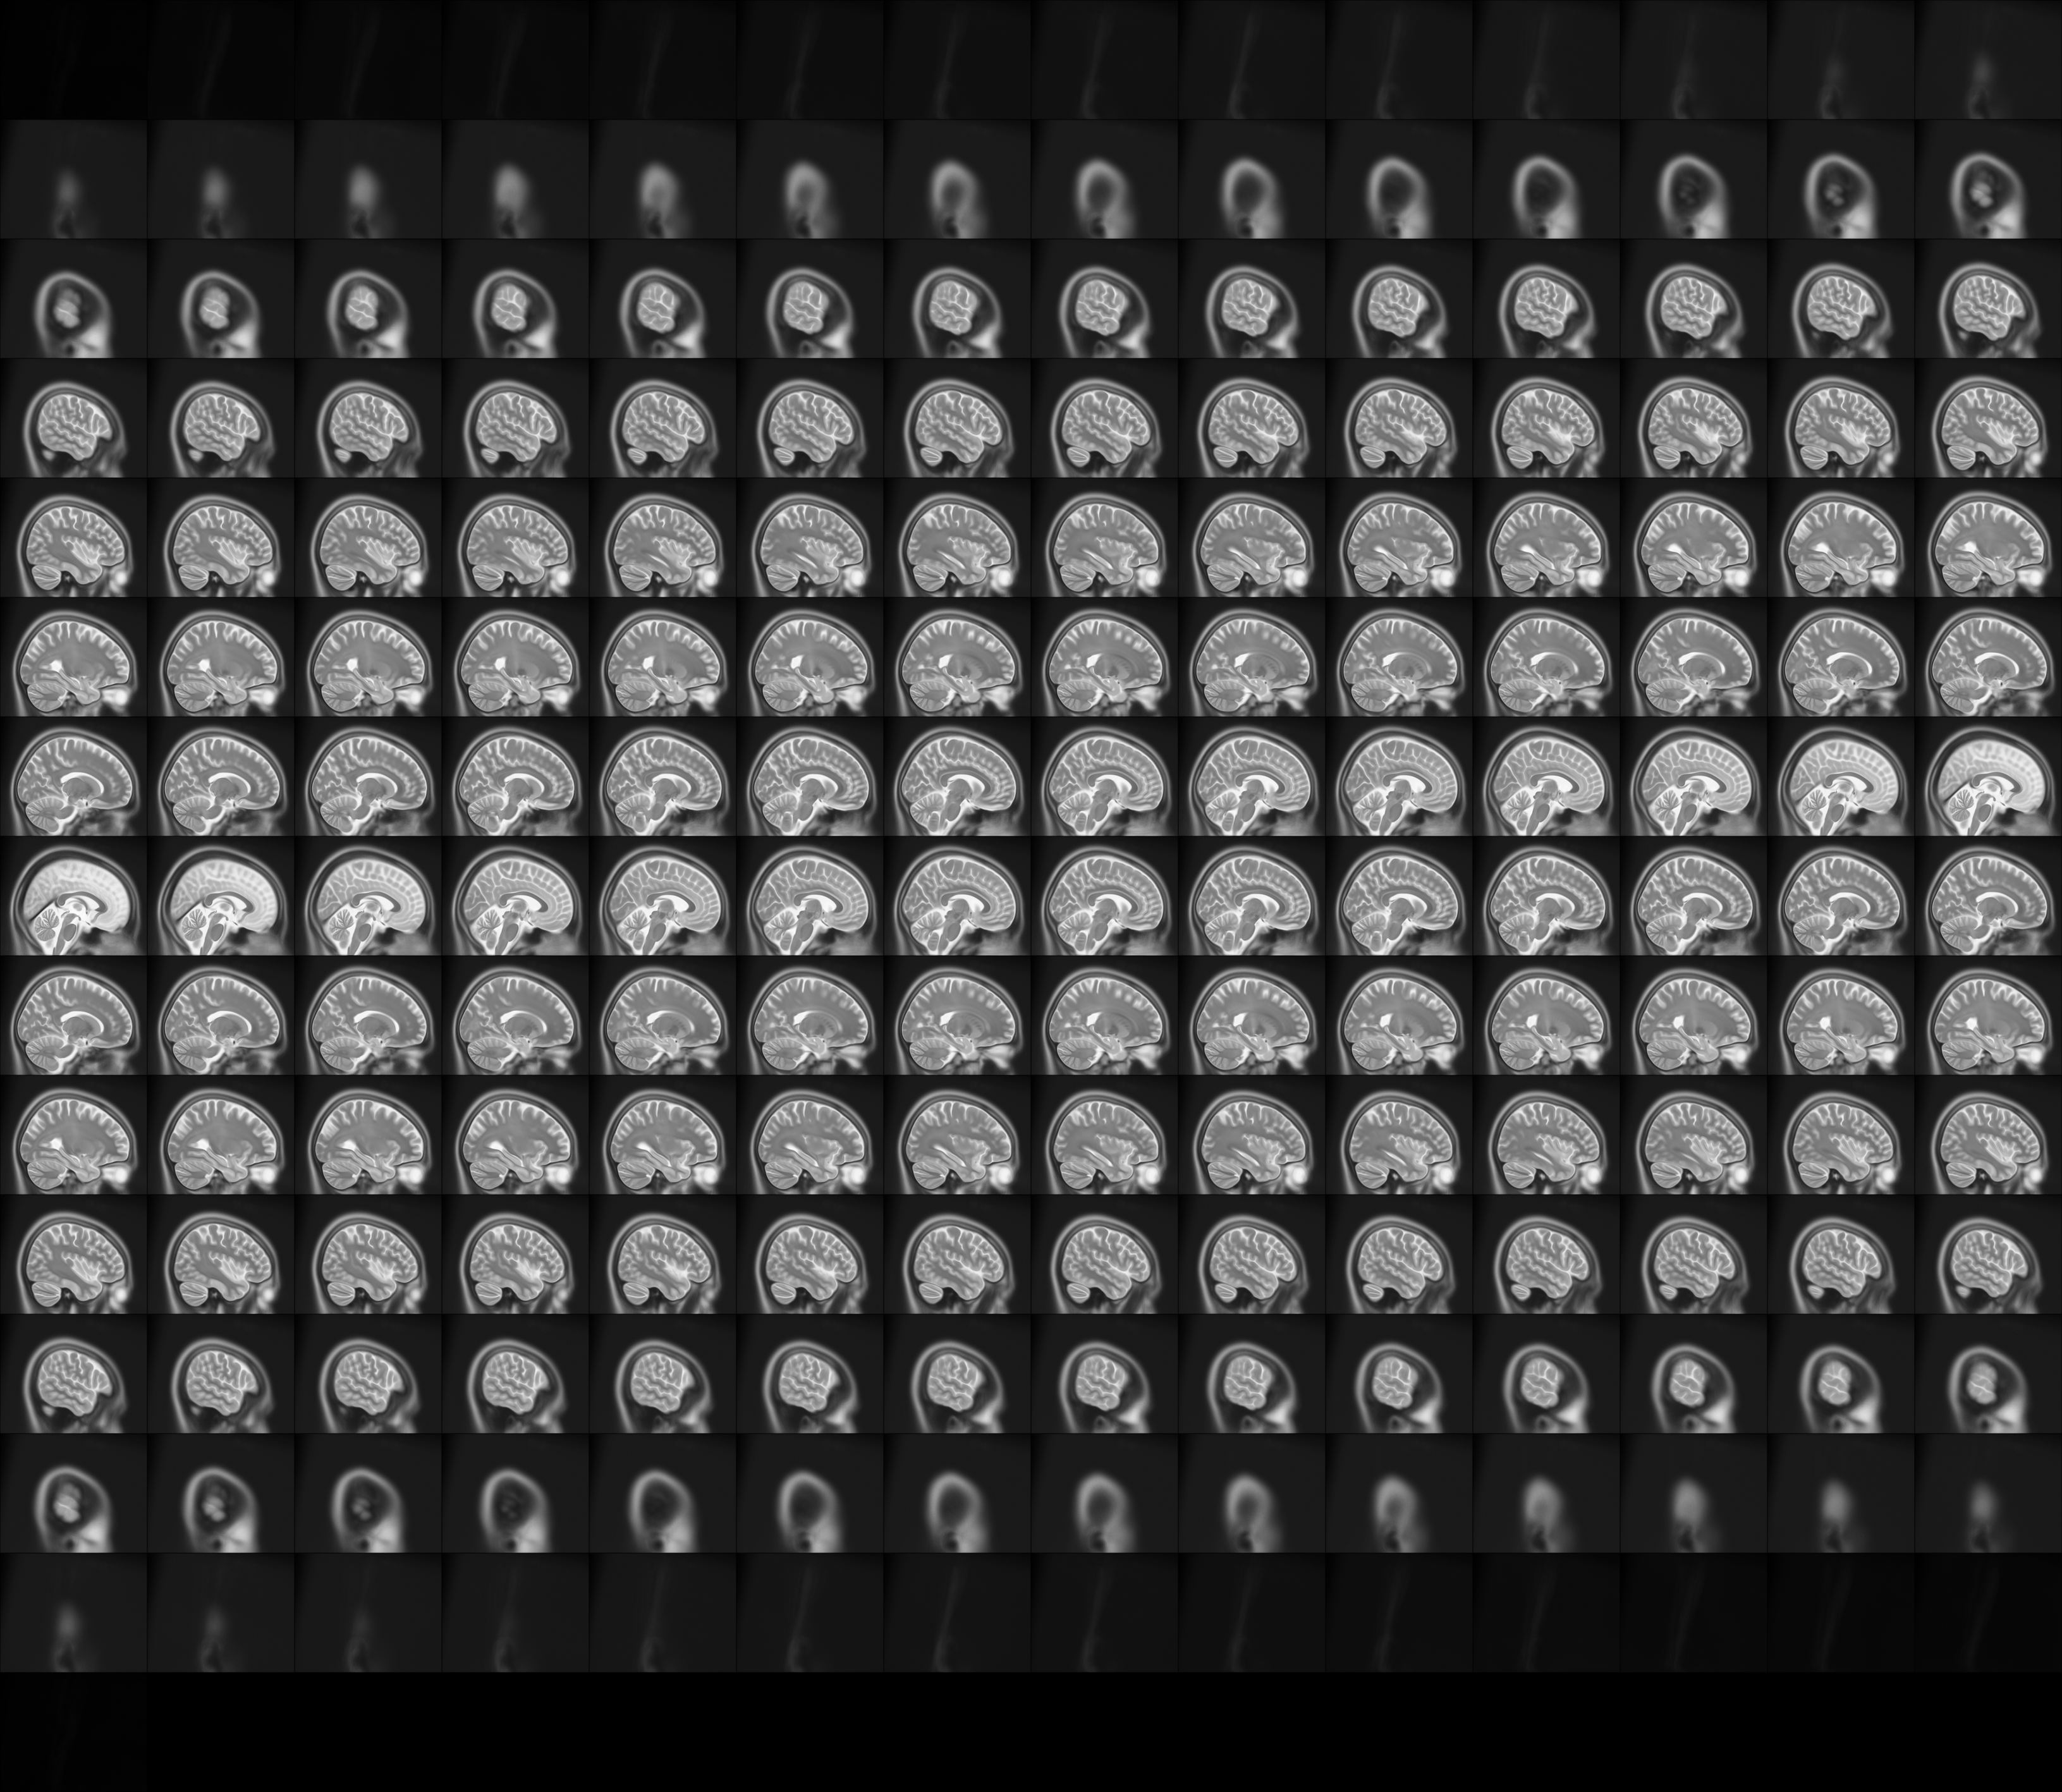

In [8]:
view_img(mni.t2, bg_img=None, title='IRM en contraste T2', cmap='gray', symmetric_cmap=False, 
                  black_bg=True, threshold=None)

### BOLD ou T2*
T2* est un autre type de séquence. Elle a plusieurs applications possibles dont l'imagerie fonctionnelle. Cette séquence nous permet d'imager les variations magnétiques du système vasculaire cérébrale, soit principalement l'oxygénation sanguine (relative). 

Mais, [la relaxation T2 (T2*)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2799958/) est aussi importante pour étudier les traumatismes crâniens, les tumeurs, et les arrêts vasculaires-cérébraux, puisqu'elle nous permet d'imager la structure du système vasculaire.

### Importer des données d'IRMf
Un *localizer* est un terme pour désigner une carte d'activation cérébrale associée à une modalité sensorielle ou une tâche spécifique (i.e. calcul arithmétique, langage, mémoire, etc.).

On importe alors :
* une carte de valeurs t
* une image anatomique (T1)

In [9]:
from nilearn.datasets import fetch_localizer_button_task
localizer_dataset = fetch_localizer_button_task()
# Carte d'activation motrice pour un sujet
localizer_tmap = localizer_dataset.tmap
# Image constraste T1 du sujet
localizer_anat = localizer_dataset.anat

C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\numpy\lib\npyio.py:2322: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


### Bloc activation main gauche vs. main droite
On visualise les valeurs t associées au constraste des blocs expérimentaux. C'est-à-dire qu'on moyenne le signal associé à l'activation motrice de la main gauche, puis celle de la droite. Ensuite, on les a soustrait l'un à l'autre. La probabilité (signification statistique) associée à cette différence d'activation est représenté par l'échelle de couleur.

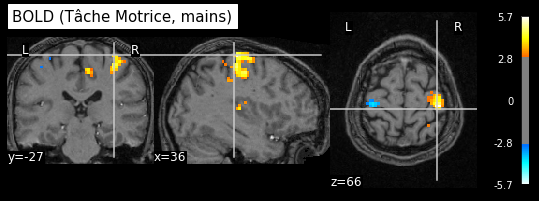

In [10]:
from nilearn.plotting import plot_stat_map
plot_stat_map(localizer_tmap,
              bg_img=localizer_anat,  # on pourrait également mettre mni.t1
              cut_coords=(36, -27, 66),
              threshold=3, title="BOLD (Tâche Motrice, mains)",
              dim=-.5)

### Visualiser l'activation sans image anatomique
Il est possible de se représenter la carte d'activation dans un espace arbitraire. Ça nous est moins utile en ce moment, mais lorsqu'on voudra observer un connectome (connectivité fonctionnelle), ce genre de visualisation sera intuitive.

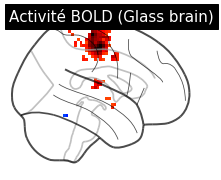

In [11]:
from nilearn.plotting import plot_glass_brain
plot_glass_brain(localizer_tmap, display_mode='r', plot_abs=False,
                 title='Activité BOLD (Glass brain)', threshold=3)

### Visualiser l'activation à la surface
On peut aussi lisser le volume cérébral (lui enlever ses circonvolutions/sillons) et visualiser l'activité BOLD à la surface du cortex.

On commence donc par importer un modèle surfacique du cerveau (`fetch_surf_fsaverage`) ainsi qu'une fonction qui convertit le volume en surface (`vol_to_surf`)

In [12]:
from nilearn.surface import vol_to_surf
from nilearn.datasets import fetch_surf_fsaverage
fsaverage = fetch_surf_fsaverage('fsaverage')

On place la carte d'activation utilisée précédemment dans la surface de notre choix. Ici, on choisit la surface piale (on appelle aussi cela *pial surface mesh*). 

In [13]:
texture = vol_to_surf(localizer_tmap, 
                      fsaverage.pial_right)  # effacez pial_right et appuyez sur tab pour + options

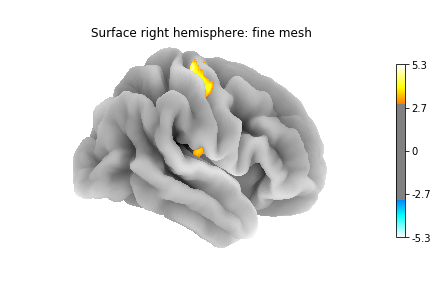

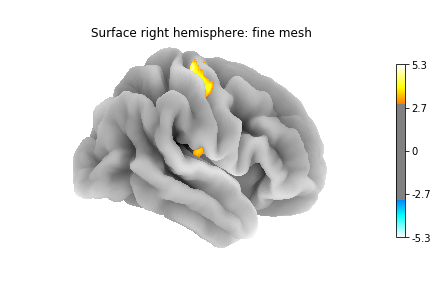

In [14]:
from nilearn.plotting import plot_surf_stat_map
plot_surf_stat_map(fsaverage.pial_right,
                   texture, hemi='right', view='lateral',
                   colorbar=True, title='Surface right hemisphere: fine mesh',
                   threshold=3, bg_map=fsaverage.sulc_right)

#### Rappel
La pondération en T2 considère le déphasage des spins.
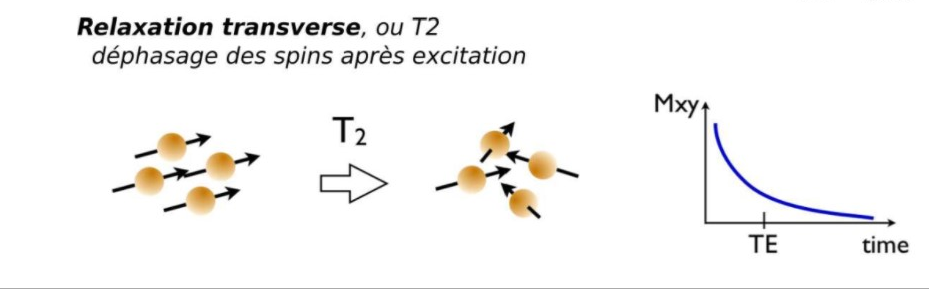

## Images pondérées pour la diffusion (*diffusion weigthed imaging*) 
La pondération de la diffusion requiert une TE court et un TR long. On n'accomplie pas un contraste révélant les différences structurelles entre les tissues.

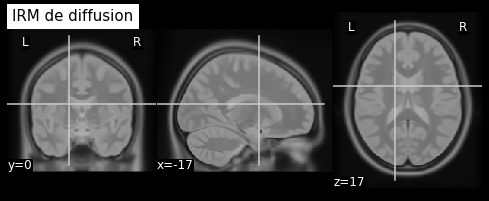

In [15]:
plot_anat(mni.pd, cut_coords=[-17, 0, 17], title='IRM de diffusion')

# Résumé
Les contrastes que nous venons de voir se réalisent tous en utilisant des séquences d'***Echo Planar Imaging*** (EPI). Chacune d'entre elles module selon 3 paramètres principaux, soient le TR, le TE et l'angle de bascule (flip angle). 

**ECHO-PLANAR IMAGING**
* **T1 - TE et TR courts**
    * Structurel
* **T2 - TE et TR longs**
    * Structurel
* **T2* - TE et TR longs + Angle de bascule bas**
    * BOLD
* **DWI - TE court et TR long**
    * Orientation de l'eau

![](http://mri-q.com/uploads/3/4/5/7/34572113/1517606_orig.gif)